## Exemplo 1

**O fabricante de certa marca de barras de cereais *light* afirma que a média de gordura saturada encontrada em seus produtos é de 0,5 g. Em uma amostra aleatória de 8 barras de cereal desta marca, a quantidade de gordura o observada foi 0,6; 0,7; 0,7; 0,3; 0,4; 0,5; 0,4; 0,2. Você concorda com a afirmação da empresa? Assuma uma distribuição normal.**

## Resolução

Temos que encontrar uma estatística que seja relacionada com a média da distribuição e a média amostral, mas que não envolva a variância da distribuição, pois este é um dado desconhecido. Podemos utilizar a estatística:
$$
    U = \frac{(\bar{X}-\mu) \, \sqrt{n}}{S}
$$
segue a distribuição $t$-student com $(n-1)$ graus de liberdade. 

O teste de hipótese fica:
$$
\begin{cases}
    H_0: \ \ \mu = 0,5 \\ H_1: \ \ \mu \neq 0,5
\end{cases}
$$

Utilizando o valor suposto da média da distribuição, a média amostral calculada e o desvio-padrão calculado podemos encontrar $U$. Á partir deste valor, podemos encontrar a área à esquerda de $U$ no gráfico da distribuição t-Student (ou através de uma tabela). Com isso, e sabendo que a hipótese é simples, podemos calcular facilmente o $p$-valor e definir se podemos rejeitar a hipótese nula ou não.

[1] "Média amostral = 0.475"
[1] "Desvio-padrão amostral = 0.183225076262581"
[1] "U = -0.38592249249398"
[1] "p-valor = 0.711015080148591"


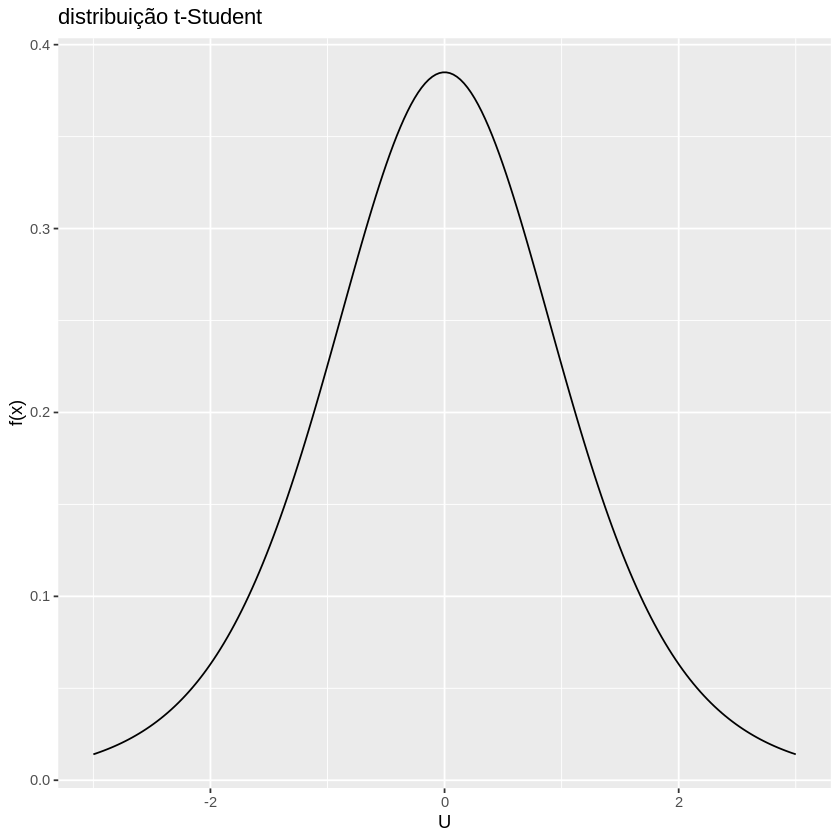

[1] "Limites de aceitação [ alfa = 0.05 ] = [ 0.321820002877283 : 0.628179997122717 ]"



	One Sample t-test

data:  x
t = -0.38592, df = 7, p-value = 0.711
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.32182 0.62818
sample estimates:
mean of x 
    0.475 


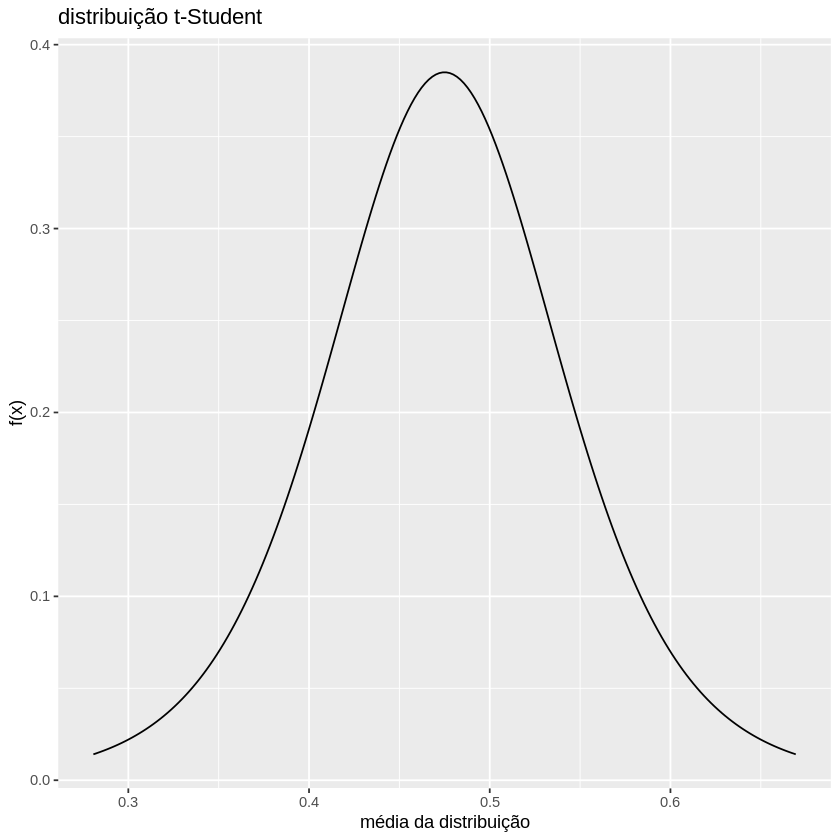

In [3]:
# variáveis
x  <- c(0.6, 0.7, 0.7, 0.3, 0.4, 0.5, 0.4, 0.2) # quantidade de gordura observadas
l  <- length(x) # tamanho da amostra
mu <- 0.5       # suposição 
alfa <- 0.05    

# cálculos
S  <- sd(x) # desvio-padrão amostral
media <- mean(x) # médias amostral

print(paste('Média amostral =',media))
print(paste('Desvio-padrão amostral =',S))

# variável U
u <- sqrt(l)*(media-mu)/S
print (paste('U =',u))

# vamos calcular a área área à esquerda de u
# para isso podemos utilizar a tabela da distribição t-Student, encontrando o valor
# mais próximo do valor tabelado ou utilizando a função pt
#
# pt (u, df) : retorna a área à esquerda de u, na distribuição t-Student com df graus de liberdade
c <- pt(u, df=l-1)


# para o p-valor, como esta é uma hipótese simples, temos
print(paste('p-valor =',2*c))

###########
# gráfico de U
library (ggplot2)

xt <- seq(-3,3,l=200)
df <- data.frame(
    x=xt,
    y=dt(xt,df=l-1)
)

ggplot (df) +
    geom_line (aes(x=x,y=y)) +
    labs (x="U", title="distribuição t-Student", y="f(x)")

### Gráfico da probabilidade da média da distribuição
# 
# Aqui isolamos mu na equação U = sqrt(n)*(Xn - mu)/S e, para cada xt encontrado
# acima, encontramos o mu correspondente.
xt2 <- media - xt*S/sqrt(l)
df2 <- data.frame (
    x=xt2,
    y=dt(xt,df=l-1)
)
ggplot (df2) +
    geom_line (aes(x=x,y=y)) +
    labs (x="média da distribuição", title="distribuição t-Student", y="f(x)")

#########


### Vamos supor que queiramos utilizar um nível de confiança 1-alfa (definido acima):

# cálculo dos limites da zona de aceitação
### estes limites podem ser encontrados através de uma tabela, ou através da função
# qt (p, df): dado um valor de probabilidade p, esta função retorna o valor de U para o qual
# temos uma área igual a p do lado esquerdo de U, para uma distribuição t-Student com df
# graus de liberdade
c1 <- qt(alfa/2, df=l-1)
c2 <- qt(1-alfa/2, df=l-1)

### cálculo da média da distribuição equivalente
mu1 <- media+c1*S/sqrt(l)
mu2 <- media-c1*S/sqrt(l)
print(paste('Limites de aceitação [ alfa =', alfa ,'] = [',mu1,':',mu2, ']'))


# prova dos 9... o R já tem uma função que realiza boa parte destes cálculos.. Coloco aqui por comparação...
t.test(x, mu=0.5)

## Exemplo 2

**Uma máquina preenche recipientes de 5 litros de detergente líquido automaticamente. Espera-se que a variância no preenchimento da máquina não seja maior do que 150 ml$^2$. Em uma amostra de 20 recipientes, notou-se que a variância amostra ficou em 160 ml$^2$. Utilizando $\alpha = 0,05$ e supondo que a quantidade de líquido em cada recipiente tenha distribuição normal, o que se pode dizer sobre a variância $\sigma^2$ da quantidade de líquido em cada recipiente?**

### Resposta

Neste caso estamos interessados em comparar a variância amostral com a variância da distribuição. Como as médias não estão envolvidas, podemos utilizar a estatística:
$$
    Q = \frac{(n-1)\,S^2}{\sigma^2}
$$
que segue uma distribuição de $\chi^2$ com $(n-1)$ graus de liberdade. Com o $\alpha$ dado, podemos calcular os valores limites da zona de aceitação, $\chi_{0.025}^2$ e $\chi_{0.975}^2$. Em posse destes valores, podemos encontrar os limites da zona de aceitação em termos de $S$, isolando ele na equação acima. 

[1] "Valor de qhi = 20.2666666666667"
[1] "P-valor = 0.757390029768776"
[1] "Valor de qui (alfa= 0.05 ) = [ 8.90651648198797 : 32.8523268617297 ]"
[1] "Valor de S2 (alfa= 0.05 ) = [ 92.5353023788812 : 341.323120677756 ]"


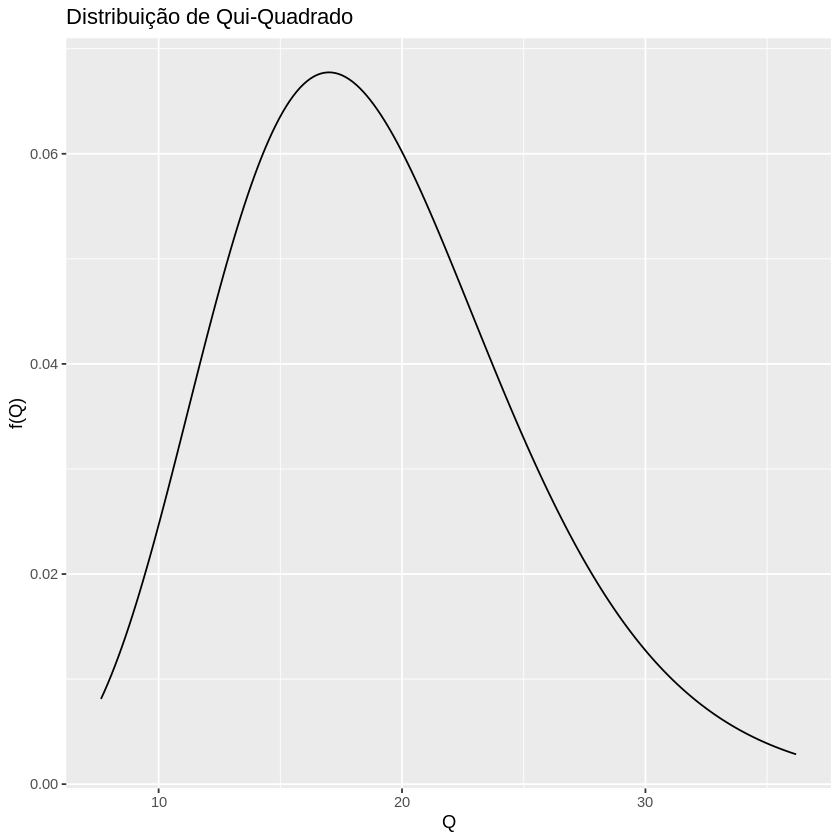

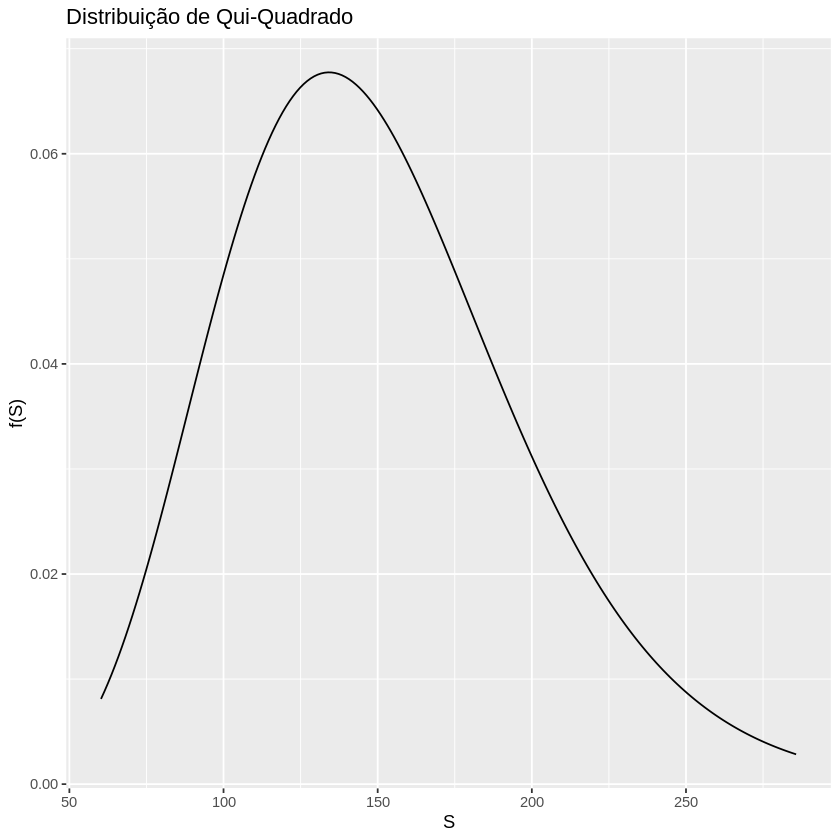

In [4]:
# variáveis
sigma2 <- 150
n      <- 20
S2     <- 160
alfa   <- 0.05

# variável aleatória
qui <- (n-1)*S2/sigma2
print(paste('Valor de qhi =',qui))

# pegar o valor à esquerda de qui
meio_p <- 1 - pchisq (qui, n-1)
p_valor = 2*meio_p
print(paste('P-valor =',p_valor))

# usando o alpha dado para pegar os pontos críticos
c1 <- qchisq (alfa/2, n-1)
c2 <- qchisq (1-alfa/2, n-1)
print (paste('Valor de qui (alfa=', alfa, ') = [', c1,':', c2, ']'))

# usando os pontos críticos para encontrar os valors limites de sigma2
S2c_1 <- (n-1)*S2/c1
S2c_2 <- (n-1)*S2/c2
print (paste('Valor de S2 (alfa=', alfa, ') = [', S2c_2,':', S2c_1, ']'))


x <- seq(qchisq (0.01, n-1), qchisq (0.99, n-1), l=200)
y <- dchisq(x, n-1)

dt <- data.frame (
    x=x,
    y=y
)
ggplot (dt) +
    geom_line (aes(x=x, y=y)) + 
    labs(x="Q", y="f(Q)", title="Distribuição de Qui-Quadrado")


xt <- x*sigma2/(n-1)

dt2 <- data.frame (
    x=xt,
    y=y
)
ggplot (dt2) +
    geom_line (aes(x=x, y=y)) +
    labs(x="S", y="f(S)", title="Distribuição de Qui-Quadrado")

## Exemplo 3

**Considere o caso de uma empresa que vende determinado produto e está interessada em saber a proporção de mulheres, em relação aos homens, que compram este produto. Em uma pesquisa realizada em 70 compradores, se descobriu que 58 foram mulheres. A empresa considerava inicialmente que a proporção de mulheres que compram este produto é de 0.8. O resultado da pesquisa corrobora a expectativa da empresa, com um nível de significância de 95\%?**

In [9]:
## variáveis
n <- 70
mu0 <- 0.8    # expectativa da proporção
pm  <- 58/70  # proporção observada



A variável $X$ segue uma distribuição de Bernoulli. Assim a média é dada por $\mu = p$ e a variância é dada por $\sigma^2 = p(1-p)$. A média segue uma distribuição normal padrão com:
$$
    Z = \frac{(\bar{X} - \mu)}{\sqrt{\frac{\sigma^2}{n}}} =\frac{(\bar{X} - p)}{\sqrt{\frac{p(1-p)}{n}}}
$$

Dado $\alpha$, podemos encontrar os limites da zona de aceitação, através de $Z_{\alpha/2}$ e $Z_{1-\alpha/2}$. Com este valor, podemos estimar os valores limites de $p$, com confiança de $(1-\alpha)$, isolando $p$ na expressão acima, encontrando:
$$
    p_{\text{limite}} = \frac{\Big(2 \,n \, \bar{X}_n + Z_{\alpha/2}^2\Big) \pm Z_{\alpha/2}\,\sqrt{4\,n\,\bar{X}_n\,(1-\bar{X})+Z_{\alpha/2}^2} }{ 2\,(n + Z_{\alpha/2}^2)}
$$

[1] "media amostral = 0.828571428571429"
[1] "O z atual = 0.597614304667197"
[1] "Limites da zona de aceiação em Z = [ -1.95996398454005 : 1.95996398454005 ]"
[1] "Limites da probabilidade = [ 0.723833519678546 : 0.899122753594708 ]"
[1] "p-valor = 0.550097317230397"


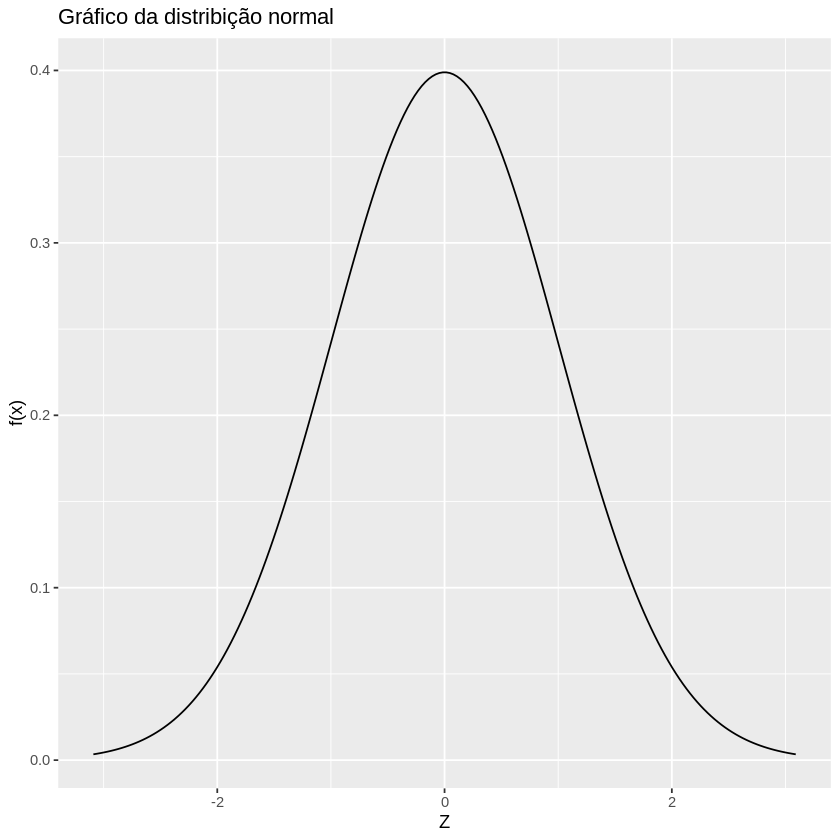

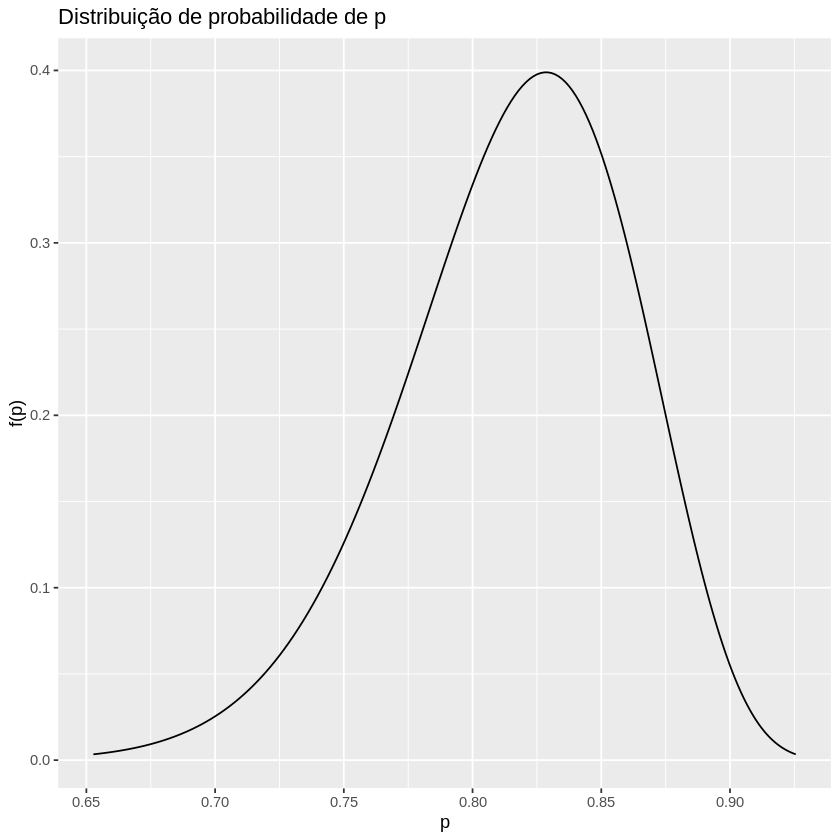

In [16]:
## resolução

# vamos calcular o Z atual
media <- pm    # media amostral
print(paste('media amostral =',media))
z <- (media-mu0)/sqrt(mu0*(1-mu0)/n)  # Z com a média amostral
print(paste('O z atual =', z))


# vamos calcular os limites, na variável Z
alfa = 0.05   # 1-alfa = nível de confiança
z1 <- qnorm(alfa/2)    # limite inferior da zona de aceitação em Z
z2 <- qnorm(1-alfa/2)  # limite superior da zona de aceitação em Z
print(paste('Limites da zona de aceiação em Z = [',z1,':',z2,']'))


# com os limites de aceitação acima, vamos calcular os limites de p
calcula_limites_probabilidade <- function (alfa) {
    z1 <- qnorm(alfa)
    delta <- 4*n*media*(1-media)+z1**2
    uga1 <- ( (2*n*media + z1**2) + z1*sqrt( delta ) ) / (2*(n + z1**2))
    uga2 <- ( (2*n*media + z1**2) - z1*sqrt( delta ) ) / (2*(n + z1**2))
    print(paste('Limites da probabilidade = [', uga1,':', uga2, ']'))
}

calcula_limites_probabilidade (alfa/2)


# calculando o p-valor
p_valor <- 2*(1-pnorm(z))
print(paste('p-valor =',p_valor))

### gráficos
x <- seq(qnorm(0.001), qnorm(0.999), l=200)
y <- dnorm(x)
df <- data.frame (
    z=x,
    f_z=y
)

ggplot(df) +
    geom_line(aes(x=z, y=f_z)) +
    labs (x="Z", y="f(x)", title="Gráfico da distribição normal")

z <- x
for (i in 1:length(x)) {
    z1 <- x[i]
    delta <- 4*n*media*(1-media)+z1**2
    z[i] <- ( (2*n*media + z1**2) - z1*sqrt( delta ) ) / (2*(n + z1**2))
}
#z <- mu0+x*sqrt(mu0*(1-mu0)/n)
df <- data.frame (
    z=z,
    f_z=y
)

ggplot(df) +
    geom_line(aes(x=z, y=f_z)) +
    labs(x="p", y="f(p)", title="Distribuição de probabilidade de p")
